# Computer Vision 101
## Dell AI Delivery Academy
### [Dr. Elias Jacob de Menezes Neto](https://sigaa.ufrn.br/sigaa/public/docente/portal.jsf?siape=2353000)

# Summary

## Keypoints

- Convolutional Neural Networks (CNNs) are powerful for image tasks, using convolutional layers to extract spatial features while preserving spatial relationships

- Key CNN components:
- Convolutional layers for feature extraction
- Pooling layers for downsampling and feature generalization
- Fully connected layers for final classification

- Data augmentation artificially increases dataset size and diversity through image transformations, improving model robustness and generalization

- Transfer learning leverages pre-trained models to improve performance on new tasks, saving time and computational resources
- Feature extraction uses pre-trained layers as fixed feature extractors
- Fine-tuning adapts pre-trained weights to the new task

- ResNet architecture uses residual connections to effectively train very deep networks by mitigating vanishing gradients

- Normalizing inputs using the pre-trained model's mean and std ensures consistent processing

- Gradually unfreezing layers during fine-tuning allows controlled adaptation while preserving useful low-level features

## Takeaways

- CNNs outperform fully connected networks on image tasks while using fewer parameters by leveraging spatial structure

- Proper CNN architecture design with convolutional, pooling, and fully connected layers is crucial for effective feature extraction and classification

- Data augmentation techniques like flipping, rotation, scaling, and color jittering significantly boost model performance and generalization, especially with limited data

- Transfer learning through feature extraction or fine-tuning dramatically reduces training time, computational requirements, and data needs by reusing knowledge from large datasets

- ResNet enables training very deep CNNs with improved accuracy by addressing vanishing gradients through residual connections

- Matching input normalization to the pre-trained model is essential for consistent processing during transfer learning

- Gradually unfreezing layers during fine-tuAn error occured, please retry or continue in a different thread

# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a powerful class of artificial neural networks designed for working with image data. They utilize the spatial structure of images to extract meaningful features, making them incredibly effective at tasks like image classification and object detection.
Convolutional Neural Networks utilize convolutional layers to extract and preserve spatial relationships, pooling layers to down-sample and generalize features, and fully connected layers to make precise classifications. By combining these layers, CNNs achieve exceptional performance in tasks involving image and object recognition.


## Introduction to CNNs

CNNs preserve the spatial structure of problems and are extensively used for object recognition tasks such as handwritten digit recognition and face detection. In this lesson, you will discover:

- The building blocks used in CNNs such as convolutional layers and pooling layers.
- How these building blocks fit together with a short worked example.
- Best practices for configuring CNNs for your own tasks.

### Why Convolutional Neural Networks?

Given a dataset of grayscale images standardized to 28x28 pixels each, a traditional feedforward neural network would require 784 input weights (plus one bias). Flattening the image matrix into a vector loses the spatial structure within the image, making it difficult for the neural network unless all images are perfectly resized.

CNNs preserve the spatial relationship between pixels by learning internal feature representations using small squares of input data. These learned features can detect objects regardless of shifts or translations in the image. This capability makes CNNs effective for object recognition in various orientations.

#### Key Benefits of CNNs

- **Fewer Parameters:** CNNs use fewer parameters (weights) compared to fully connected networks.
- **Invariance:** They are designed to be invariant to object position and distortion in the scene.
- **Automatic Feature Learning:** CNNs automatically learn and generalize features from the input domain.

## Why Spatial Relationships Matter

In the context of images, it's not just the individual pixel values that matter but also their spatial arrangement. Flattening a 2-dimensional matrix of pixel values into a 1-dimensional array loses this spatial information. CNNs address this issue by preserving the spatial relationships between pixels.

## What are Features in Images?

A feature in an image is a visually distinctive attribute that helps in recognizing and differentiating objects. For instance, features of a dog image may include its tail, fur, and ears. These features enable us to identify a dog regardless of its breed.


### The Philosophical Aspect

Consider this: What makes a dog... a dog? Imagine describing a dog to someone who has never seen one. You would talk about key characteristics like shape, size, fur, etc. This touches on a philosophical idea proposed by Plato, suggesting that there exists an ideal form or essence for everything. For dogs, this "Form of Dog" represents the perfect essence, encapsulating what it means to be a dog. In the context of CNNs, features are the essence of an object that helps in recognizing it. This essence is learned by the network during training and is represented by a dense vector containing the object's key attributes. This is usually know as an **embedding**.

## Extracting Features Using Convolutions

To extract features from images, CNNs use a mathematical operation called *convolution*. Here's how it works:

- **Kernel**: A small matrix used for convolution.
- **Image Grid**: The larger grid representing the image.

### Steps of Convolution Operation:

1. **Place the Kernel**: Position the kernel over a block of the image.
2. **Element-wise Multiplication**: Multiply each element of the kernel by the corresponding element of the image block.
3. **Sum the Products**: Add up the results of these multiplications to obtain a single value.

This operation is performed across the entire image to produce a feature map, highlighting important features like edges, textures, and patterns.

![Convolution Illustration](images/conv_basic.png)

## Why Use Convolutions?

Convolutions are essential for detecting various features within an image, such as edges, textures, and patterns. Different kernels can be used to detect different types of features. By stacking multiple convolutional layers, CNNs can build up complex representations of images, making them highly effective for image-related tasks.

## How Convolution Works
To understand this, let's consider a simple example illustrated in the paper ["A Guide to Convolution Arithmetic for Deep Learning"](https://arxiv.org/abs/1603.07285). Here's a visual representation showing a light blue 4×4 image and a dark blue 3×3 kernel applied over it:

![Convolution Illustration](images/conv2.png)

From the visual:

- The original image has a height (`h`) of 4 pixels and a width (`w`) of 4 pixels.
- The kernel (filter) has dimensions of 3×3 pixels.

When the kernel is applied (convolved) over the image, the following steps occur:
1. **Positioning the Kernel:** The kernel is placed at the top-left corner of the image.
2. **Element-wise Multiplication:** Each element of the kernel is multiplied by the corresponding element of the image block under it.
3. **Summation:** The results of these multiplications are summed up to produce a single value.
4. **Repetition:** The kernel moves across the image with a certain stride, repeating the above steps until the entire image is covered.

The result is a transformed output known as the feature map:
- For our current configuration, the resulting activation map (feature map) will have a height of `h-2` and a width of `w-2`, due to the size of the kernel (3×3).

Thus, if the original image is 4×4, the resulting feature map after applying a 3×3 kernel will be of size 2×2.

## Building Complex Models with CNNs

We'll see how these simple convolution operations combine to create powerful models. These models can accomplish complex tasks, including image classification and object detection, demonstrating the true potential of CNNs.

## Layers in a CNN

<p align="center">
<img src="images/cnn_diagram.webp" alt="" style="width: 50%; height: 50%"/>
</p>

There are three primary types of layers in a CNN:

1. **Convolutional Layers**
2. **Pooling Layers**
3. **Fully Connected Layers**

### Convolutional Layers
Convolutional layers are composed of filters and feature maps.

#### Filters
Filters, similar to neurons in traditional networks, have weighted inputs and generate output values. The input size is a fixed square called a patch or receptive field. In an input layer, these patches are pixel values, while deeper layers receive inputs from feature maps created by previous layers.

#### Feature Maps
The feature map is the output generated by applying a filter across the previous layer. As the filter moves across the layer, each position results in an activation collected in the feature map.

**Terms to Know:**
- **Stride:** The distance the filter moves across the input during each activation.
- **Zero Padding:** Technique to handle cases where the receptive field reads off the edge by adding mock inputs with zero values.

### Pooling Layers
Pooling layers down-sample the feature map from previous layers. They follow convolutional layers and help consolidate learned features, preventing overfitting by generalizing feature representations.

- Often use smaller receptive fields than convolutional layers.
- Common operations include taking the average or maximum of input values to create new feature maps.

### Fully Connected Layers
Fully connected layers are traditional layers in a flat feedforward neural network. They may use nonlinear activation functions or softmax activations to output class predictions. They typically appear at the end of the network, making final classifications based on extracted features.



## Challenging Dataset
To thoroughly test and understand the capabilities of ResNet, we need a more challenging dataset than MNIST. The MNIST dataset, consisting of grayscale images of handwritten digits, is relatively simple, and conventional CNNs can achieve nearly 100% accuracy on it. Therefore, we'll use our Dogs Vs Cats dataset, which is more complex and challenging.

In [1]:
import torchvision.transforms.v2
import torchvision
from torch import nn
import torch.nn.functional as F
import os
import pandas as pd
from glob import glob
from PIL import Image
import torch
from typing import Optional, Tuple
import torchmetrics

# Define a set of transformations to be applied to the images
# These transformations will preprocess the images before they are fed into the model
image_transforms = torchvision.transforms.v2.Compose([
    # Convert input to an image
    # This ensures that the input is in the correct format for subsequent transformations
    torchvision.transforms.v2.ToImage(),
    
    # Convert image to float32 and scale pixel values to the range [0, 1]
    # This is a common preprocessing step for neural networks
    torchvision.transforms.v2.ToDtype(torch.float32, scale=True),
    
    # Resize image to 256x256 pixels with antialiasing
    # Resizing ensures that all images have the same dimensions, which is required for batch processing
    torchvision.transforms.v2.Resize((256, 256), antialias=True),
    
    # Normalize image using mean and std of ImageNet dataset
    # Normalization helps in speeding up convergence during training
    # The mean and std values are specific to the ImageNet dataset, which is commonly used for pre-trained models
    torchvision.transforms.v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # This won't be very useful right now, but will be useful when we use pre-trained models and apply transfer learning.
])


In [2]:
class DogsCatsDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir: str, transform: Optional[torchvision.transforms.Compose] = None):
        """
        Initialize the DogsCatsDataset.

        Args:
            root_dir (str): Directory with all the images.
            transform (Optional[torchvision.transforms.Compose]): Transformations to be applied to the images.
        """
        # Store the root directory containing the images
        self.root_dir = root_dir
        
        # Store the transformations to be applied to the images
        self.transform = transform
        
        # Get a list of all image file paths in the root directory and its subdirectories
        # The glob pattern "*/*.jpg" matches all .jpg files in subdirectories of root_dir
        self.image_paths = glob(os.path.join(root_dir, "*/*.jpg"))

    def __len__(self) -> int:
        """
        Return the total number of samples in the dataset.

        Returns:
            int: Number of samples.
        """
        # Return the number of image file paths found
        return len(self.image_paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """
        Get a sample from the dataset.

        Args:
            index (int): Index of the sample to retrieve.

        Returns:
            Tuple[torch.Tensor, int]: Tuple containing the image tensor and its label.
        """
        # Get the file path of the image at the specified index
        image_path = self.image_paths[index]
        
        # Open the image file
        image = Image.open(image_path)
        
        # Determine the label based on the file path
        # If the file path contains "CAT", assign label 1 (cat), otherwise assign label 0 (dog)
        label = 1 if "CAT" in image_path else 0

        # Apply transformations to the image if any are specified
        if self.transform:
            image = self.transform(image)

        # Return the transformed image and its label as a tuple
        return image, label

In [3]:
import lightning as L
from torch.utils.data import DataLoader
from typing import Optional

class DogsCatsDataModule(L.LightningDataModule):
    def __init__(self, batch_size: int = 128, num_workers: int = 1):
        """
        Initialize the DogsCatsDataModule.

        Args:
            batch_size (int): Number of samples per batch.
            num_workers (int): Number of subprocesses to use for data loading.
        """
        super().__init__()
        self.batch_size = batch_size
        self.num_workers = num_workers
        
    def setup(self, stage: Optional[str] = None) -> None:
        """
        Set up the datasets for training, validation, and testing.

        Args:
            stage (Optional[str]): Stage to set up (e.g., 'fit', 'validate', 'test', 'predict').
        """
        # Initialize the training dataset with the specified root directory and transformations
        self.train_dataset = DogsCatsDataset(
            root_dir="data/dogs-vs-cats/train",
            transform=image_transforms
        )
        
        # Initialize the validation dataset with the specified root directory and transformations
        self.validation_dataset = DogsCatsDataset(
            root_dir="data/dogs-vs-cats/valid",
            transform=image_transforms
        )
        
        # Initialize the test dataset with the specified root directory and transformations
        self.test_dataset = DogsCatsDataset(
            root_dir="data/dogs-vs-cats/test",
            transform=image_transforms
        )
        
    def train_dataloader(self) -> DataLoader:
        """
        Create DataLoader for the training dataset.

        Returns:
            DataLoader: DataLoader for the training dataset.
        """
        # Return a DataLoader for the training dataset
        # shuffle=True ensures that the data is shuffled at every epoch
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=self.num_workers)
    
    def val_dataloader(self) -> DataLoader:
        """
        Create DataLoader for the validation dataset.

        Returns:
            DataLoader: DataLoader for the validation dataset.
        """
        # Return a DataLoader for the validation dataset
        # shuffle=False ensures that the data is not shuffled, maintaining the order for validation
        return DataLoader(self.validation_dataset, batch_size=self.batch_size, shuffle=False, num_workers=self.num_workers)
    
    def test_dataloader(self) -> DataLoader:
        """
        Create DataLoader for the test dataset.

        Returns:
            DataLoader: DataLoader for the test dataset.
        """
        # Return a DataLoader for the test dataset
        # shuffle=False ensures that the data is not shuffled, maintaining the order for testing
        return DataLoader(self.test_dataset, batch_size=self.batch_size, shuffle=False, num_workers=self.num_workers)

In [4]:
# Initialize the data module for the Dogs vs. Cats dataset
# batch_size=128 specifies that each batch will contain 128 samples
# This data module will handle the loading and preprocessing of the dataset
dm = DogsCatsDataModule(batch_size=128)

In [5]:

# Create a simple CNN model
class SimpleCNN(L.LightningModule):
    def __init__(self, num_classes: int = 2):
        """
        Initialize the SimpleCNN model.
        Check output sizes at http://layer-calc.com/
        
        Args:
            num_classes (int): Number of classes in the dataset.
        """
        super().__init__()
        # Define convolutional layers and max pooling
        self.conv1 = torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1) # 3 (RGB) input channels, 16 output channels, 3x3 kernel, 1 stride, 1 padding. The output size will be the same as the input size due to padding.
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) # 16 input channels, 32 output channels, 3x3 kernel, 1 stride, 1 padding. The output size will be the same as the input size due to padding.
        self.conv3 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # 32 input channels, 64 output channels, 3x3 kernel, 1 stride, 1 padding. The output size will be the same as the input size due to padding.
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Input size is halved
        
        # Define fully connected layers
        self.fc1 = torch.nn.Linear(64 * 32 * 32, 512) # First fully connected layer
        self.fc2 = torch.nn.Linear(512, num_classes) # Final output layer
        
        # Combine layers into a sequential model
        self.sequential = torch.nn.Sequential(
            self.conv1, # Output size: 16 x 256 x 256
            torch.nn.ReLU(), # ReLU activation
            self.pool, # Output size: 16 x 128 x 128
            self.conv2, # Output size: 32 x 128 x 128
            torch.nn.ReLU(), # ReLU activation
            self.pool, # Output size: 32 x 64 x 64
            self.conv3, # Output size: 64 x 64 x 64
            torch.nn.ReLU(), # ReLU activation
            self.pool, # Output size: 64 x 32 x 32
            torch.nn.Flatten(), # Flatten the output
            self.fc1, # Output size: 512
            torch.nn.ReLU(), # ReLU activation
            self.fc2 # Output size: num_classes
        )

        # Define accuracy metric
        self.accuracy = torchmetrics.Accuracy(task="binary")
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the model.

        Args:
            x (torch.Tensor): Input tensor.

        Returns:
            torch.Tensor: Output tensor.
        """
        x = self.sequential(x)
        return x

    def training_step(self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int) -> torch.Tensor:
        """
        Training step for the model.

        Args:
            batch (Tuple[torch.Tensor, torch.Tensor]): Batch of data containing inputs and labels.
            batch_idx (int): Index of the batch.

        Returns:
            torch.Tensor: Computed loss for the batch.
        """
        inputs, labels = batch
        logits = self(inputs)
        loss = F.cross_entropy(logits, labels)
        self.log("train_loss", loss, prog_bar=True)
        return loss
    
    def validation_step(self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int) -> None:
        """
        Validation step for the model.

        Args:
            batch (Tuple[torch.Tensor, torch.Tensor]): Batch of data containing inputs and labels.
            batch_idx (int): Index of the batch.
        """
        inputs, labels = batch
        logits = self(inputs)
        loss = F.cross_entropy(logits, labels)
        self.log("val_loss", loss, prog_bar=True, sync_dist=True)
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        self.log("val_acc", torch.sum(preds == labels).item() / len(labels), prog_bar=True, sync_dist=True)

    
    def test_step(self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int) -> None:
        """
        Test step for the model.

        Args:
            batch (Tuple[torch.Tensor, torch.Tensor]): Batch of data containing inputs and labels.
            batch_idx (int): Index of the batch.
        """
        inputs, labels = batch
        logits = self(inputs)
        loss = F.cross_entropy(logits, labels)
        self.log("test_loss", loss, prog_bar=True)
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        self.log("test_acc", torch.sum(preds == labels).item() / len(labels), prog_bar=True)

    def configure_optimizers(self) -> torch.optim.Optimizer:
        """
        Configure the optimizer for the model.

        Returns:
            Optimizer: Configured optimizer.
        """
        return torch.optim.Adam(self.parameters(), lr=3e-4)

In [6]:
# Initialize the model
simple_model = SimpleCNN()

# Initialize a checkpoint callback to save the model during training
# This callback monitors the validation loss and saves the model with the lowest validation loss
checkpoint_callback = L.pytorch.callbacks.ModelCheckpoint(
    monitor="val_loss",  # Metric to monitor for saving the best model
    dirpath="checkpoints",  # Directory where the checkpoints will be saved
    filename="simple-cnn-{epoch:02d}-{val_loss:.2f}",  # Filename template for the saved checkpoints
    save_top_k=1,  # Save only the best model (with the lowest validation loss)
    mode="min"  # Mode to determine the best model; 'min' means lower validation loss is better
)  # Save the best model based on validation loss

In [7]:
# Initialize the trainer, which is responsible for handling the training process
trainer = L.Trainer(
    max_epochs=10,  # Train the model for a maximum of 10 epochs
    accelerator='auto',  # Automatically select the best available hardware (CPU or GPU)
    devices=2,  # Use 2 devices (e.g., 2 GPUs) for training
    precision=16,  # Use 16-bit precision for faster training and reduced memory usage
    callbacks=[checkpoint_callback]  # Add the checkpoint callback to save the best model during training
)

# Train the model using the trainer
# dm is the data module that provides the training and validation datasets
trainer.fit(simple_model, dm)

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/pytorch/plugins/precision/amp.py:52: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Initializing distributed: GLOB

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental 

In [8]:
print(f'Best model path: {checkpoint_callback.best_model_path}')

Best model path: /media/nas-elias/drive/UFRN/Disciplinas/2024-2/Dell Deep Learning and Gen-AI/checkpoints/simple-cnn-epoch=06-val_loss=0.45.ckpt


In [9]:
# Reload the best model from the checkpoint
# This loads the model with the lowest validation loss saved during training
# checkpoint_callback.best_model_path contains the path to the best model checkpoint
best_model = SimpleCNN.load_from_checkpoint(checkpoint_callback.best_model_path)

# Initialize a new trainer for inference or further evaluation
# accelerator='cpu' specifies that we are using the CPU for this stage
# callbacks=[checkpoint_callback] ensures that the checkpoint callback is included
# This is useful if we want to continue training or perform additional evaluations
new_trainer = L.Trainer(
    accelerator='cpu',  # Use CPU for inference
    callbacks=[checkpoint_callback]  # Include the checkpoint callback
)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


In [10]:
# Evaluate the best model on the test dataset using the new trainer
# best_model is the model loaded from the checkpoint with the lowest validation loss
# dm is the data module that provides the test dataset
# This will run the test method to compute metrics such as accuracy and loss on the test set
# The results will help us understand how well the model generalizes to unseen data
new_trainer.test(best_model, datamodule=dm)

2024-08-03 16:27:25.651108: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 16:27:25.669798: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 16:27:25.676153: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 16:27:25.691313: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 16:27:26.526817: W tensorflow/compiler/tf2

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.79534512758255      │
│         test_loss         │    0.44242116808891296    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.44242116808891296, 'test_acc': 0.79534512758255}]

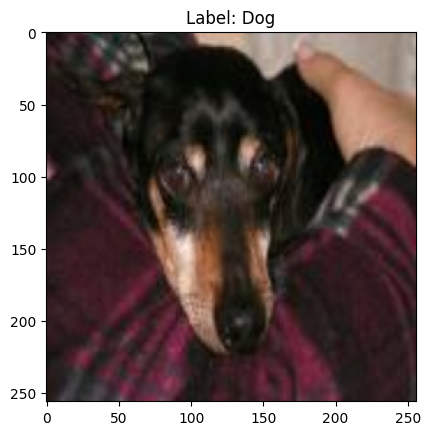

In [11]:
from matplotlib import pyplot as plt

# Define a mapping from numerical labels to class names
label_mapping = {0: "Dog", 1: "Cat"}

# Get one batch of images and labels from the test dataloader of the data module dm
# next(iter(...)) retrieves the first batch from the dataloader
image, label = next(iter(dm.test_dataloader()))

# Select the first image and its corresponding label from the batch
image = image[0]
label = label[0]

# Revert the normalization applied during preprocessing to get the original image values
# The normalization values used here should match those used during training
image = image * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)

# Display the image using matplotlib
# permute(1, 2, 0) changes the order of dimensions from (C, H, W) to (H, W, C) for displaying
plt.imshow(image.permute(1, 2, 0))

# Set the title of the plot to the class name of the image
# label_mapping[int(label)] converts the numerical label to a class name
plt.title(f"Label: {label_mapping[int(label)]}")

# Show the plot
plt.show()

In [12]:
def count_parameters(model):
    # Calculate the total number of trainable parameters in the model
    # p.numel() returns the number of elements in the parameter tensor
    # p.requires_grad checks if the parameter requires gradient computation (i.e., it is trainable)
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the total number of trainable parameters in the best_model
# count_parameters(best_model) returns the count of trainable parameters
# :, in the format string adds commas as thousand separators for better readability
print(f"The model has {count_parameters(best_model):,} trainable parameters")

The model has 33,579,554 trainable parameters


> Do you remember the number of trainable parameters from our Notebook 02? There were 70,260,738 trainable parameters. More than twice the number of parameters in our simple CNN model (yet, our accuracy was less than 60%).
>
> This is the power of CNNs and the reason why they are so effective in image-related tasks.

# Introduction to ResNet (Residual Network) Architecture


Building upon the foundational knowledge of Convolutional Neural Networks (CNNs), let's understand the ResNet (Residual Network) architecture.

## Origin of ResNet
ResNet was introduced in 2015 by Kaiming He et al. in their seminal paper ["Deep Residual Learning for Image Recognition"](https://arxiv.org/abs/1512.03385). Since its introduction, ResNet has become one of the most widely used model architectures in deep learning.

## Why ResNet is Important
The primary innovation of ResNet is the use of residual connections or "skip connections." These are shortcuts that allow the model to bypass one or more layers, addressing the problem of vanishing gradients in very deep networks. This makes it possible to train much deeper networks without a loss in performance.

## Overview of Residual Connections
Residual connections help to:
1. **Improve Gradient Flow:** By providing alternate paths for gradient backpropagation.
2. **Mitigate Vanishing Gradients:** Making it feasible to train deeper models with higher accuracy.
3. **Simplify Learning:** Allowing the network to learn identity mappings which make training easier.

Modern image models often incorporate these residual connections. Most contemporary advancements in image models are essentially variations and improvements upon the original ResNet structure.


## Basic Structure of ResNet
We will first examine the basic ResNet as it was initially designed. The fundamental building block of ResNet is the residual block, which consists of two or three convolutional layers along with a shortcut connection that skips one or more layers. This design allows the network to learn residual functions with reference to the layer inputs.

## Modern Tweaks and Enhancements
After understanding the basic architecture, we will explore modern tweaks and enhancements that have made ResNet even more performant. These adjustments include modifications in:
- **Block Structure:** Variations in the number of layers within a residual block.
- **Layer Types:** Incorporation of different types of layers like bottleneck layers.
- **Normalization Techniques:** Advanced normalization techniques for better convergence.
- **Activation Functions:** Use of more effective activation functions.

## ResNet Variants
ResNet has several variants, including ResNet-18, ResNet-34, ResNet-50, ResNet-101, and ResNet-152. The numbers in the names indicate the number of layers in the network. For instance, ResNet-50 has 50 layers, while ResNet-101 has 101 layers. These variants are designed for different use cases, with deeper networks offering higher accuracy but requiring more computational resources.


`Let's implement a ResNet model. We'll use the ResNet-34 variant, which is a good balance between performance and computational efficiency. This model has 34 layers and is widely used for various image recognition tasks.`

In [13]:
class ResNet34Model(L.LightningModule):
    def __init__(self, num_classes: int = 2):
        super().__init__()
        # Load ResNet34 model without pre-trained weights
        self.resnet34 = torchvision.models.resnet34(pretrained=False)
        # Modify the final fully connected layer to match our number of classes
        self.resnet34.fc = nn.Linear(self.resnet34.fc.in_features, num_classes)

        # Initialize accuracy metric for binary classification
        self.accuracy = torchmetrics.Accuracy(task="binary")
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Simple forward pass through the ResNet34 model
        return self.resnet34(x)

    def training_step(self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int) -> torch.Tensor:
        inputs, labels = batch
        logits = self(inputs)
        # Compute cross-entropy loss
        loss = F.cross_entropy(logits, labels)
        # Log the training loss
        self.log("train_loss", loss, prog_bar=True)
        return loss
    
    def validation_step(self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int) -> None:
        inputs, labels = batch
        logits = self(inputs)
        # Compute validation loss
        loss = F.cross_entropy(logits, labels)
        # Log validation loss
        self.log("val_loss", loss, prog_bar=True, sync_dist=True)
        
        # Compute probabilities and predictions
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        # Compute and log validation accuracy
        self.log("val_acc", torch.sum(preds == labels).item() / len(labels), prog_bar=True, sync_dist=True)

    
    def test_step(self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int) -> None:
        inputs, labels = batch
        logits = self(inputs)
        # Compute test loss
        loss = F.cross_entropy(logits, labels)
        # Log test loss
        self.log("test_loss", loss, prog_bar=True)
        
        # Compute probabilities and predictions
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        # Compute and log test accuracy
        self.log("test_acc", torch.sum(preds == labels).item() / len(labels), prog_bar=True)

    def configure_optimizers(self) -> torch.optim.Optimizer:
        # Use Adam optimizer with a learning rate of 3e-4
        return torch.optim.Adam(self.parameters(), lr=3e-4)

In [14]:
# Initialize the ResNet34 model
resnet34_model = ResNet34Model()

# Initialize a checkpoint callback to save the model during training
# This callback monitors the validation loss and saves the model with the lowest validation loss
checkpoint_callback = L.pytorch.callbacks.ModelCheckpoint(
    monitor="val_loss",  # Metric to monitor for saving the best model
    dirpath="checkpoints",  # Directory where the checkpoints will be saved
    filename="resnet34_model-{epoch:02d}-{val_loss:.2f}",  # Filename template for the saved checkpoints
    save_top_k=1,  # Save only the best model (with the lowest validation loss)
    mode="min"  # Mode to determine the best model; 'min' means lower validation loss is better
)

# Initialize the trainer, which is responsible for handling the training process
trainer = L.Trainer(
    max_epochs=10,  # Train the model for a maximum of 10 epochs
    accelerator='auto',  # Automatically select the best available hardware (CPU or GPU)
    devices=1,  # Use 1 device (e.g., 1 GPUs) for training
    precision=16,  # Use 16-bit precision for faster training and reduced memory usage
    callbacks=[checkpoint_callback]  # Add the checkpoint callback to save the best model during training
)

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/pytorch/plugins/precision/amp.py:52: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch

In [15]:
# Train the model
trainer.fit(resnet34_model, dm)

You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:652: Checkpoint directory /media/nas-elias/drive/UFRN/Disciplinas/2024-2/Dell Deep Learning and Gen-AI/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type           | Params | Mode 
----------------------------------------------------
0 | resnet34 | ResNet         | 21.3 M | train
1 | accuracy | BinaryAccuracy | 0      | train
----------------------------------------------------
21.3 M    Trainable params
0         Non-trainable params
21.3 M    Total params
85.143    Tot

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.
/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [16]:
print(f'Best model path: {checkpoint_callback.best_model_path}')

Best model path: /media/nas-elias/drive/UFRN/Disciplinas/2024-2/Dell Deep Learning and Gen-AI/checkpoints/resnet34_model-epoch=06-val_loss=0.20.ckpt


In [17]:
# Reload the best model from the checkpoint
# This loads the model with the lowest validation loss saved during training
# checkpoint_callback.best_model_path contains the path to the best model checkpoint
best_model = ResNet34Model.load_from_checkpoint(checkpoint_callback.best_model_path)

# Initialize a new trainer for inference or further evaluation
new_trainer = L.Trainer(
    accelerator='cpu',  # Use CPU for inference
    callbacks=[checkpoint_callback]  # Include the checkpoint callback
)

# Evaluate the best model on the test dataset using the new trainer
# best_model is the model loaded from the checkpoint with the lowest validation loss
# dm is the data module that provides the test dataset
# This will run the test method to compute metrics such as accuracy and loss on the test set
# The results will help us understand how well the model generalizes to unseen data
new_trainer.test(best_model, datamodule=dm)

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/lightning/fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
GPU available: True (cuda), used: False

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9297752976417542     │
│         test_loss         │    0.16893933713436127    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.16893933713436127, 'test_acc': 0.9297752976417542}]

In [18]:
def count_parameters(model):
    # Calculate the total number of trainable parameters in the model
    # p.numel() returns the number of elements in the parameter tensor
    # p.requires_grad checks if the parameter requires gradient computation (i.e., it is trainable)
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the total number of trainable parameters in the best_model
# count_parameters(best_model) returns the count of trainable parameters
# :, in the format string adds commas as thousand separators for better readability
print(f"The model has {count_parameters(best_model):,} trainable parameters")

The model has 21,285,698 trainable parameters


> <br>
>
> - Our fully connected model had 70,260,738 trainable parameters and accuracy was around 60%
> - Our simple CNN model had 33,579,554 trainable parameters and accuracy improved to 79%
> - Our ResNet-34 model has 21,285,698 trainable parameters and accuracy improved to around 90%
>
> As you can see, the number of trainable parameters is decreasing while the accuracy is increasing. This is why ResNet is so powerful and widely used in image recognition tasks.

# Data Augmentation

Data augmentation is a powerful method used to artificially increase the size of a dataset by applying various transformations to the existing data. This technique is particularly beneficial when working with image data, contributing significantly to improved model performance and generalization.

In this part of our course, we will explore:

- The significance of data augmentation in deep learning.
- Common data augmentation techniques for image data.
- Implementing data augmentation using PyTorch and the `torchvision` library.

## Why Data Augmentation?

1. **Increased Dataset Size:** By transforming the existing data in multiple ways, we can effectively enlarge our dataset. This helps the model to better learn and generalize from more varied examples.

2. **Improved Model Robustness:** Data augmentation introduces variations such as changes in lighting, orientation, or scale, making the model more adept at handling these variations in real-world data.

3. **Regularization:** Introducing noise and variability through data augmentation acts similarly to regularization techniques, mitigating overfitting and improving the model's predictive power.

## Common Data Augmentation Techniques

Several techniques are commonly used to increase image data:

1. **Flipping:** Horizontally or vertically flipping images to provide different perspectives.
2. **Rotation:** Rotating images by specific angles to simulate different orientations.
3. **Scaling:** Resizing images either by zooming in or out to include variations in size.
4. **Translation:** Shifting images horizontally or vertically to mimic slight positional changes.
5. **Brightness Adjustment:** Modifying the brightness levels to account for lighting differences.
6. **Contrast Adjustment:** Changing the contrast to highlight or diminish features.
7. **Noise Addition:** Adding random noise which can help the model learn to ignore minor distortions or artifacts.

These techniques can be combined in numerous ways to generate a diverse and expansive training dataset without needing additional labeled data.

## Implementing Data Augmentation in PyTorch

Using PyTorch, data augmentation is conveniently implemented with the `torchvision` library. This library offers an extensive range of built-in transformations tailored for image data. These transformations can be applied to your training data by using `transforms.v2.Compose`, which allows chaining together multiple augmentations seamlessly.

- It's crucial not to apply data augmentation to the test dataset since the intention is to evaluate the model's performance on the original, unmodified images. An advanced technique called Test Time Augmentation (TTA) exists where augmentations are applied to test data during inference, aiming to enhance model performance. While TTA is beyond the scope of this course, it's worth noting for future exploration.

By understanding and implementing these techniques, you can greatly improve the robustness and effectiveness of your deep learning models, particularly when dealing with image data.

## Training Data Augmentation vs Test Data Augmentation

### Training Data Augmentation

- Typically, data augmentation is applied solely to the training data. This approach enhances the diversity of the training set and improves the model's toughness and ability to generalize to new, unseen examples.

### Test Data Augmentation

- It's crucial not to apply data augmentation to the test dataset since the intention is to evaluate the model's performance on the original, unmodified images. There's an advanced technique called [Test Time Augmentation (TTA)](https://arxiv.org/abs/2402.06892), where augmentations are applied to test data during inference, aiming to enhance model performance. While TTA is beyond the scope of this course, it's worth noting for future exploration.

## Choosing the Right Augmentation Techniques

Selecting the appropriate augmentation techniques is crucial for improving the performance and robustness of your model. Here are some key factors to consider:

### 1. Domain Knowledge
- **Understand Your Dataset:** Analyze the nature of your data to identify suitable transformations. For instance, with images of handwritten digits, rotating them might not be as effective as flipping or scaling.
- **Context-Specific Transformations:** Some transformations are more applicable to specific domains. For example, color adjustments might be more relevant for natural images than for medical imaging.

### 2. Task Requirements
- **Alignment with Objectives:** Ensure that the augmentation techniques align with the specific task you are working on. For example, in object detection tasks, horizontal flipping might disorient objects and hinder the model's learning.
- **Preserving Essential Features:** Be cautious not to apply transformations that could distort critical features necessary for accurate predictions. For instance, in facial recognition, excessive rotation might obscure key facial landmarks.

### 3. Computational Resources
- **Resource Efficiency:** Some augmentation techniques require significant computational power. Consider your available resources and choose transformations that balance effectiveness with feasibility.
- **Real-Time Processing:** If your application demands real-time processing, opt for less computationally intensive augmentations to avoid latency issues.

### 4. Model Performance
- **Experimentation and Tuning:** Finding the optimal augmentation techniques often involves experimentation. Test different transformations and combinations to see which ones yield the best improvements in model performance.
- **Monitoring Overfitting:** Use techniques like cross-validation to monitor if certain augmentations help prevent overfitting by introducing variability to the training data.

By thoughtfully selecting and applying augmentation techniques based on these factors, you can significantly enhance your model's performance, robustness, and generalization capabilities. This leads to more accurate predictions on unseen data and better overall outcomes for your machine learning projects.

In [19]:
# Define the image size to which all images will be resized
img_size = 256

# Create a list of transformations for training data
transforms_train_list = [
    torchvision.transforms.v2.ToImage(),  # Convert input to an image
    torchvision.transforms.v2.ToDtype(torch.uint8, scale=True),  # Convert image to uint8 and scale for better performance
    torchvision.transforms.v2.Resize(size=(img_size, img_size), antialias=True),  # Resize image to 256x256 with antialiasing to reduce distortion
    torchvision.transforms.v2.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally with a probability of 0.5
    torchvision.transforms.v2.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Randomly change brightness, contrast, saturation, and hue
    torchvision.transforms.v2.ToDtype(torch.float32, scale=True),  # Convert image to float32 and scale
    torchvision.transforms.v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image using mean and std of ImageNet for compatibility with pre-trained models
]

# Create a list of transformations for validation/test data
# Note: No random transformations like flips or color jitter are applied to validation data
transforms_valid_list = [
    torchvision.transforms.v2.ToImage(),  # Convert input to an image
    torchvision.transforms.v2.ToDtype(torch.uint8, scale=True),  # Convert image to uint8 and scale for better performance
    torchvision.transforms.v2.Resize(size=(img_size, img_size), antialias=True),  # Resize image to 256x256 with antialiasing to reduce distortion
    torchvision.transforms.v2.ToDtype(torch.float32, scale=True),  # Convert image to float32 and scale
    torchvision.transforms.v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image using mean and std of ImageNet for compatibility with pre-trained models
]

# Compose the list of transformations into a single transform for training data
transforms_train = torchvision.transforms.v2.Compose(transforms_train_list)

# Compose the list of transformations into a single transform for validation/test data
transforms_valid = torchvision.transforms.v2.Compose(transforms_valid_list)

> For more transforms, please check [PyTorch documentation](https://pytorch.org/vision/main/transforms.html#v2-api-reference-recommended)
>
> For viewing how these transforms affect the images, please check [these examples](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html)

In [20]:
import lightning as L
from torch.utils.data import DataLoader
from typing import Optional

class DogsCatsDataModuleV2(L.LightningDataModule):
    def __init__(self, batch_size: int = 128, num_workers: int = 1):
        """
        Initialize the DogsCatsDataModuleV2.
        
        This class manages the data loading process for our Dogs vs Cats dataset.
        It handles the creation of train, validation, and test datasets,
        as well as their respective DataLoaders.
        """
        super().__init__()
        self.batch_size = batch_size
        self.num_workers = num_workers

    def setup(self, stage: Optional[str] = None) -> None:
        """
        Set up the datasets for training, validation, and testing.
        
        This method is called by PyTorch Lightning to create the datasets.
        We use different transforms for training and validation/testing.
        """
        # Create training dataset with augmentation transforms
        self.train_dataset = DogsCatsDataset(
            root_dir="data/dogs-vs-cats/train",
            transform=transforms_train  # These transforms include data augmentation
        )
        
        # Create validation dataset with only normalization transforms
        self.validation_dataset = DogsCatsDataset(
            root_dir="data/dogs-vs-cats/valid",
            transform=transforms_valid  # These transforms only include normalization
        )
        
        # Create test dataset with the same transforms as validation
        self.test_dataset = DogsCatsDataset(
            root_dir="data/dogs-vs-cats/test",
            transform=transforms_valid  # Using the same transforms as validation
        )
        
    def train_dataloader(self) -> DataLoader:
        """
        Create and return the DataLoader for the training dataset.
        
        We shuffle the training data to ensure random order in each epoch.
        """
        return DataLoader(self.train_dataset, batch_size=self.batch_size, 
                          shuffle=True, num_workers=self.num_workers)
    
    def val_dataloader(self) -> DataLoader:
        """
        Create and return the DataLoader for the validation dataset.
        
        We don't shuffle validation data as the order doesn't matter.
        """
        return DataLoader(self.validation_dataset, batch_size=self.batch_size, 
                          shuffle=False, num_workers=self.num_workers)
    
    def test_dataloader(self) -> DataLoader:
        """
        Create and return the DataLoader for the test dataset.
        
        Similar to validation, we don't shuffle test data.
        """
        return DataLoader(self.test_dataset, batch_size=self.batch_size, 
                          shuffle=False, num_workers=self.num_workers)

In [21]:
# Initialize the data module
# batch_size=128 specifies the number of samples per batch
# num_workers=24 specifies the number of subprocesses to use for data loading
dm = DogsCatsDataModuleV2(batch_size=128, num_workers=24)

# Initialize the model
resnet34_model = ResNet34Model()

# Initialize a checkpoint callback to save the model during training
# This callback monitors the validation loss and saves the model with the lowest validation loss
checkpoint_callback = L.pytorch.callbacks.ModelCheckpoint(
    monitor="val_loss",  # Metric to monitor for saving the best model
    dirpath="checkpoints",  # Directory where the checkpoints will be saved
    filename="resnet34_model_data_aug-{epoch:02d}-{val_loss:.2f}",  # Filename template for the saved checkpoints
    save_top_k=1,  # Save only the best model (with the lowest validation loss)
    mode="min"  # Mode to determine the best model; 'min' means lower validation loss is better
)  # Save the best model based on validation loss

# Initialize the trainer, which is responsible for handling the training process
trainer = L.Trainer(
    max_epochs=10,  # Train the model for a maximum of 10 epochs
    accelerator='auto',  # Automatically select the best available hardware (CPU or GPU)
    devices=1,  # Use 1 device
    precision=16,  # Use 16-bit precision for faster training and reduced memory usage
    callbacks=[checkpoint_callback]  # Add the checkpoint callback to save the best model during training
)

# Train the model
# trainer.fit starts the training process using the specified model and data module
trainer.fit(resnet34_model, dm)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type           | Params | Mode 
----------------------------------------------------
0 | resnet34 | ResNet         | 21.3 M | train
1 | accuracy | BinaryAccuracy | 0      | train
----------------------------------------------------
21.3 M    Trainable params
0         Non-trainable params
21.3 M    Total params
85.143    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [22]:
print(f'Best model path: {checkpoint_callback.best_model_path}')

Best model path: /media/nas-elias/drive/UFRN/Disciplinas/2024-2/Dell Deep Learning and Gen-AI/checkpoints/resnet34_model_data_aug-epoch=04-val_loss=0.22.ckpt


In [23]:
# Reload the best model from the checkpoint
# This loads the model with the lowest validation loss saved during training
# checkpoint_callback.best_model_path contains the path to the best model checkpoint
best_model = ResNet34Model.load_from_checkpoint(checkpoint_callback.best_model_path)

# Initialize a new trainer for inference or further evaluation
new_trainer = L.Trainer(
    accelerator='cpu',  # Use CPU for inference
    callbacks=[checkpoint_callback]  # Include the checkpoint callback
)

# Evaluate the best model on the test dataset using the new trainer
# This will run the test method to compute metrics such as accuracy and loss on the test set
# The results will help us understand how well the model generalizes to unseen data
new_trainer.test(best_model, datamodule=dm)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9153290390968323     │
│         test_loss         │    0.20538561046123505    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.20538561046123505, 'test_acc': 0.9153290390968323}]

In [24]:
print(f"The model has {count_parameters(best_model):,} trainable parameters")

The model has 21,285,698 trainable parameters


> <br>
>
> - Our fully connected model had 70,260,738 trainable parameters and accuracy was around 60%
> - Our simple CNN model had 33,579,554 trainable parameters and accuracy improved to 79%
> - Our ResNet-34 model has 21,285,698 trainable parameters and accuracy improved to around 90%
> - Our ResNet-34 model with data augmentation has the same number of trainable parameters and accuracy improved to around 92%.
>
> As you can see, the number of trainable parameters hasn't changed, but the accuracy has improved. **By using data augmentation, we were able to improve the model's performance without increasing the complexity of the model nor needing more data.**

# Transfer Learning

Transfer learning is a machine learning methodology wherein we utilize a pre-trained model developed for one task as the starting point for a different, yet related task. This approach has gained immense popularity in deep learning applications, particularly within computer vision (CV) and natural language processing (NLP).

The fundamental rationale behind transfer learning lies in its ability to significantly reduce the computational resources and time required to develop complex models from scratch. By leveraging existing knowledge from pre-trained models, we can achieve substantial performance improvements on new tasks.


<p align="center">
<img src="images/transfer_learning3.png" alt="" style="width: 50%; height: 50%"/>
</p>

## Origins and Applications of Transfer Learning

Transfer learning is a powerful machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. It has been highly successful in fields such as computer vision (CV) and natural language processing (NLP), where leveraging pre-trained models can greatly enhance performance and reduce the time and resources needed to develop new models.

### Computer Vision (CV)

Historically, transfer learning first gained prominence in the domain of computer vision (CV). This method involves utilizing a neural network that has already been trained on a large and diverse dataset, such as ImageNet. The pre-trained model serves as a basis for solving other CV tasks, such as image classification or object detection, by adapting it to the specific requirements of a new, often smaller, dataset.

The fundamental idea behind using a pre-trained model is that it has already learned how to extract relevant features from images. Let's break this down:

- **Edges:** In the initial (lower) layers of the network, the feature maps typically capture basic edges and directions, such as horizontal or vertical lines.
- **Textures and Patterns:** Moving deeper into the network (middle layers), the feature maps begin to visualize more complex textures and patterns.
- **Objects and Parts of Objects:** In the top layers, the feature maps depict high-level structures, including parts of objects and entire objects themselves.

By leveraging these pre-learned features, we can significantly accelerate the training process for new tasks. For instance, instead of starting from scratch, your model can build on previously learned knowledge about edges, textures, and objects, making it much more efficient.

Below is an example diagram illustrating feature extraction at different stages of a neural network. This will help you visualize what happens internally at each layer:

<p align="center">
<img src="images/cnn_layers_view.webp" alt="" style="width: 50%; height: 50%"/>
</p>

This hierarchical learning enables the model to generalize well across varied image distributions, including different lighting conditions, angles, and object types.


### Natural Language Processing (NLP)

More recently, around 2018, transfer learning began to demonstrate remarkable effectiveness in NLP. The [FastAI](https://www.fast.ai/) team introduced the [Universal Language Model Fine-Tuning (ULMFiT)](https://arxiv.org/abs/1801.06146) technique, showcasing its capability to tackle various NLP tasks efficiently.

- **ULMFiT Approach:**
    1. **Pre-training:** A language model is initially trained on a large corpus of unlabeled text (e.g., Wikipedia). This phase helps the model understand grammar, semantics, and some world facts.
    2. **Fine-tuning:** The pre-trained language model is then fine-tuned on a domain-specific dataset to adapt to the peculiarities of the target text.
    3. **Classifier Fine-tuning:** Finally, a classifier is added, and the entire model is fine-tuned for the specific task, such as sentiment analysis, document classification, or question answering.

## The Value of Transfer Learning

Transfer learning offers numerous advantages:

- **Reduced Training Time:** Pre-trained models have already grasped essential features from large datasets, drastically cutting down the training duration for new tasks.
- **Lower Computational Requirements:** Because the central features are pre-learned, the computational load is lighter compared to training from scratch.
- **Enhanced Performance with Limited Data:** When there's a scarcity of labeled data, transfer learning leverages knowledge from related tasks, leading to better performance.
- **Broad Applicability:** Transfer learning is versatile and applicable to various domains, including image processing, NLP, and audio recognition.

## Precautions in Using Transfer Learning

While powerful, transfer learning requires careful application:

- **Data Similarity:** The success largely depends on how similar the source and target data are. Divergent datasets may yield diminished performance gains.
- **Task Complexity:** Simple tasks with minimal computational needs might not benefit significantly from transfer learning.
- **Fine-tuning Risks:** Over-fine-tuning can lead to overfitting, resulting in poor generalization to new data.

Properly applied, transfer learning unlocks huge potential in creating efficient and highly effective machine learning models.


## How to Kickstart Transfer Learning

Starting your neural network training with a pre-trained model is highly recommended. This method substantially reduces the amount of required data compared to starting from scratch.

In scenarios where no pre-trained models exist, such as medical imaging, employing general-purpose models like those pre-trained on ImageNet can still offer benefits. Research indicates that even partial layers from such models can accelerate training and enhance accuracy. This is known as **feature extraction** and these layers are called **backbone**. The backbone of a pre-trained CNN becomes quite good at detecting edges, textures, and shapes, which are useful for many tasks. Please check [the CNN explainer](https://poloclub.github.io/cnn-explainer/) for a more visual explanation.

## Unveiling Self-Supervised Learning
Self-supervised learning becomes particularly valuable when pre-trained models aren't available within your domain. It involves using built-in labels from the input data itself, eliminating the need for external labels.

### Self-Supervised Learning for Natural Language Processing (NLP)
In ULMFiT, a language model is pre-trained to predict the next word in a sentence, thereby learning about language structure and semantics. This model can then be fine-tuned for specific tasks, achieving state-of-the-art results with minimal data.

> Language modeling is the "de facto" way to apply self-supervised learning to NLP. However, several methods can be leveraged for various language modeling tasks, which we'll explore further.

### Self-Supervised Learning for Computer Vision (CV)
Self-supervised learning in computer vision typically involves designing tasks where the supervision signal comes from the data itself. Here are a few popular techniques:

1. **Image Colorization:** The task requires converting grayscale images back to color. The network learns semantic content and context to perform colorization effectively.
2. **Rotation Prediction:** The model is trained to predict the degree of rotation applied to an image (0°, 90°, 180°, or 270°). This forces the network to understand the geometric and structural relations within the image.
3. **Contrastive Learning:** Techniques like SimCLR involve training the model to identify which parts of transformed versions of the same image are similar while differentiating them from other images.
4. **Jigsaw Puzzles:** An image is divided into patches, shuffled, and the model is tasked with reconstructing the original image. This encourages the network to learn about spatial relationships between different parts of the image.

These self-supervised learning techniques allow models to learn rich features from unlabeled data, making them highly effective when transferred to downstream tasks such as image classification, segmentation, and object detection.

`Let's implement a Transfer Learning model. We'll use the ResNet-34 model pre-trained on the ImageNet dataset. This pre-trained model will serve as the backbone for our new model, which we'll fine-tune on our Dogs Vs Cats dataset.`

In [25]:
# Same Dataset, DataModule and Transforms as before

> Below is the trick. We'll get almost the same module, but now we'll change `pretrained=True` so we can use the pre-trained weights from ImageNet.
>
> This will download the weights from [PyTorh's servers](https://pytorch.org/vision/stable/models.html) and we'll have a model that is already trained on ImageNet. This is the power of Transfer Learning.

In [26]:
class ResNet34PreTrainedModel(L.LightningModule):
    def __init__(self, num_classes: int = 2):
        super().__init__()
        # Load pre-trained ResNet34 model
        self.resnet34 = torchvision.models.resnet34(pretrained=True)
        
        # Replace the final fully connected layer to match our number of classes
        self.resnet34.fc = nn.Linear(self.resnet34.fc.in_features, num_classes)

        # Freeze all layers except the final classifier
        for param in self.resnet34.parameters():
            param.requires_grad = False
        for param in self.resnet34.fc.parameters():
            param.requires_grad = True

        # Alternative: Fine-tuning approach (commented out)
        # Uncomment to update all model weights during training
        # for param in self.resnet34.parameters():
        #     param.requires_grad = True

        # Initialize accuracy metric for binary classification
        self.accuracy = torchmetrics.Accuracy(task="binary")
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.resnet34(x)

    def training_step(self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int) -> torch.Tensor:
        inputs, labels = batch
        logits = self(inputs)
        loss = F.cross_entropy(logits, labels)
        self.log("train_loss", loss, prog_bar=True)
        return loss
    
    def validation_step(self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int) -> None:
        inputs, labels = batch
        logits = self(inputs)
        loss = F.cross_entropy(logits, labels)
        self.log("val_loss", loss, prog_bar=True, sync_dist=True)
        
        # Calculate and log validation accuracy
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        self.log("val_acc", torch.sum(preds == labels).item() / len(labels), prog_bar=True, sync_dist=True)

    def test_step(self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int) -> None:
        inputs, labels = batch
        logits = self(inputs)
        loss = F.cross_entropy(logits, labels)
        self.log("test_loss", loss, prog_bar=True)
        
        # Calculate and log test accuracy
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        self.log("test_acc", torch.sum(preds == labels).item() / len(labels), prog_bar=True)

    def configure_optimizers(self) -> torch.optim.Optimizer:
        # Use Adam optimizer with a learning rate of 3e-4
        return torch.optim.Adam(self.parameters(), lr=3e-4)

In [27]:
# Initialize the data module
dm = DogsCatsDataModuleV2(batch_size=128, num_workers=24)

# Initialize the model
resnet34_pretrained_model = ResNet34PreTrainedModel()

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [28]:
print(f"The model has {count_parameters(resnet34_pretrained_model):,} trainable parameters")


The model has 1,026 trainable parameters



> `Notice that the number of trainable parameters is much smaller than before. This is because we are using a pre-trained model and only updating the weights of the final layer. All other layers are frozen and their weights are not updated. We went from 21,285,698 trainable parameters to 1,026, which is almost 21,000 times less computing power required to train the model.`

In [29]:
# Initialize a checkpoint callback to save the model during training
# This callback monitors the validation loss and saves the model with the lowest validation loss
checkpoint_callback = L.pytorch.callbacks.ModelCheckpoint(
    monitor="val_loss",  # Metric to monitor for saving the best model
    dirpath="checkpoints",  # Directory where the checkpoints will be saved
    filename="resnet34_pretrained_model_data_aug-{epoch:02d}-{val_loss:.2f}",  # Filename template for the saved checkpoints
    save_top_k=1,  # Save only the best model (with the lowest validation loss)
    mode="min"  # Mode to determine the best model; 'min' means lower validation loss is better
)  # Save the best model based on validation loss

# Initialize the trainer, which is responsible for handling the training process
trainer = L.Trainer(
    max_epochs=10,  # Train the model for a maximum of 10 epochs
    accelerator='auto',  # Automatically select the best available hardware (CPU or GPU)
    devices=1,  # Use 1 devices (e.g., 1 GPU) for training
    precision=16,  # Use 16-bit precision for faster training and reduced memory usage
    callbacks=[checkpoint_callback]  # Add the checkpoint callback to save the best model during training
)

# Train the model
# trainer.fit starts the training process using the specified model and data module
trainer.fit(resnet34_pretrained_model, dm)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type           | Params | Mode 
----------------------------------------------------
0 | resnet34 | ResNet         | 21.3 M | train
1 | accuracy | BinaryAccuracy | 0      | train
----------------------------------------------------
1.0 K     Trainable params
21.3 M    Non-trainable params
21.3 M    Total params
85.143    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/miniforge3/envs/dell/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [30]:
print(f'Best model path: {checkpoint_callback.best_model_path}')

Best model path: /media/nas-elias/drive/UFRN/Disciplinas/2024-2/Dell Deep Learning and Gen-AI/checkpoints/resnet34_pretrained_model_data_aug-epoch=09-val_loss=0.03.ckpt


In [31]:
# Reload the best model from the checkpoint
# This loads the model with the lowest validation loss saved during training
# checkpoint_callback.best_model_path contains the path to the best model checkpoint
best_model = ResNet34PreTrainedModel.load_from_checkpoint(checkpoint_callback.best_model_path)

# Initialize a new trainer for inference or further evaluation
new_trainer = L.Trainer(
    accelerator='cpu',  # Use CPU for inference
    callbacks=[checkpoint_callback]  # Include the checkpoint callback
)

# Evaluate the best model on the test dataset using the new trainer
new_trainer.test(best_model, datamodule=dm)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9875602126121521     │
│         test_loss         │    0.03526074439287186    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.03526074439287186, 'test_acc': 0.9875602126121521}]

> <br>
>
> - Our fully connected model had 70,260,738 trainable parameters and accuracy was around 60%
> - Our simple CNN model had 33,579,554 trainable parameters and accuracy improved to 79%
> - Our ResNet-34 model has 21,285,698 trainable parameters and accuracy improved to around 90%
> - Our ResNet-34 model with data augmentation has the same number of trainable parameters and accuracy improved to around 92%.
> - Our Transfer Learning model has 1,026 trainable parameters and accuracy improved to around 99%.
>
> As you can see, the number of trainable parameters has decreased significantly, and the accuracy has improved. **By using Transfer Learning, we were able to reuse the knowledge from a pre-trained model and achieve a high level of accuracy with minimal training.**

# Questions

1. What is the main advantage of Convolutional Neural Networks (CNNs) over traditional fully connected networks when working with image data?

2. Name the three primary types of layers in a CNN and briefly describe their functions.

3. What is the purpose of data augmentation in training deep learning models for image classification tasks?

4. Explain the concept of transfer learning and why it's particularly useful in computer vision tasks.

5. How does the ResNet architecture address the problem of training very deep neural networks?

6. What is the difference between feature extraction and fine-tuning in the context of transfer learning?

7. Why is it important to normalize input images using the same mean and standard deviation as the pre-trained model when doing transfer learning?

8. Describe two common data augmentation techniques used in image classification tasks.

9. What is the benefit of gradually unfreezing layers when fine-tuning a pre-trained model?

10. In the notebook example, how did the number of trainable parameters and model accuracy change when moving from a custom ResNet34 model to a pre-trained ResNet34 model with transfer learning?

`Answers are commented inside this cell`

<!-- 1. The main advantage of Convolutional Neural Networks (CNNs) over traditional fully connected networks when working with image data is that CNNs preserve spatial relationships in images. They can effectively capture and utilize the 2D structure of images, leading to better feature extraction and improved performance with fewer parameters.

2. The three primary types of layers in a CNN are:
- Convolutional layers: Extract features from input images
- Pooling layers: Reduce spatial dimensions and generalize features
- Fully connected layers: Perform final classification based on extracted features

3. The purpose of data augmentation in training deep learning models for image classification tasks is to artificially increase the size and diversity of the training dataset. This helps improve model robustness, generalization, and performance, especially when working with limited data.

4. Transfer learning is the process of using a pre-trained model as a starting point for a new, related task. It's particularly useful in computer vision tasks because lower-level features (like edges, textures) learned from large datasets are often transferable to other image-related tasks, saving time and computational resources.

5. The ResNet architecture addresses the problem of training very deep neural networks by introducing residual connections (skip connections). These allow the network to learn residual functions with reference to layer inputs, which helps mitigate the vanishing gradient problem and enables the training of much deeper networks.

6. In transfer learning:
- Feature extraction involves using the pre-trained model's layers as fixed feature extractors and only training a new classifier on top.
- Fine-tuning involves updating some or all of the pre-trained model's weights to adapt to the new task.

7. It's important to normalize input images using the same mean and standard deviation as the pre-trained model because the model's weights are optimized for inputs with those specific statistical properties. Using the same normalization ensures that new inputs are processed consistently with how the model was trained.

8. Two common data augmentation techniques for image classification tasks are:
- Random horizontal flipping: Mirroring the image horizontally
- Color jittering: Randomly adjusting brightness, contrast, saturation, and hue

9. The benefit of gradually unfreezing layers when fine-tuning a pre-trained model is that it allows for a more controlled adaptation to the new task. Starting with only the top layers unfrozen helps preserve useful low-level features while adapting higher-level features, potentially leading to better performance and preventing catastrophic forgetting.

10. In the notebook example, when moving from a custom ResNet34 model to a pre-trained ResNet34 model with transfer learning:
- The number of trainable parameters decreased dramatically from 21,285,698 to 1,026.
- The model accuracy improved from around 92% to approximately 99%.

This demonstrates how transfer learning can significantly reduce computational requirements while improving model performance. -->